# Esteban Rodriguez

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Reading TestData and TrainData

 

In [3]:
#read train data and test data
Traindata = pd.read_csv('TrainData.csv') #read train data
Testdata = pd.read_csv('TestData.csv') #read test data

# seperate data from labels
y_train = Traindata.iloc[:,-1] #save the label train
Train = Traindata.iloc[:,:-1].to_numpy()
y_test = Testdata.iloc[:,-1]
Test = Testdata.iloc[:,:-1].to_numpy()

# 1.1 a) Creating and implementing PCA from scratch

In [4]:
def my_pca(D,k):
    means = np.mean(D,axis= 0)
    D1 = D - means
    
    covariance_matrix = np.cov(D1,rowvar=False,bias = True)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    positions = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[positions]
    sorted_eigenvectors = eigenvectors[:,positions]
    
    new_space = sorted_eigenvectors[:,:k]
    
    projected_data = np.dot(D1, new_space)
    
    return projected_data, new_space, means

# 1.1 b) Applying my_pca to Train data set

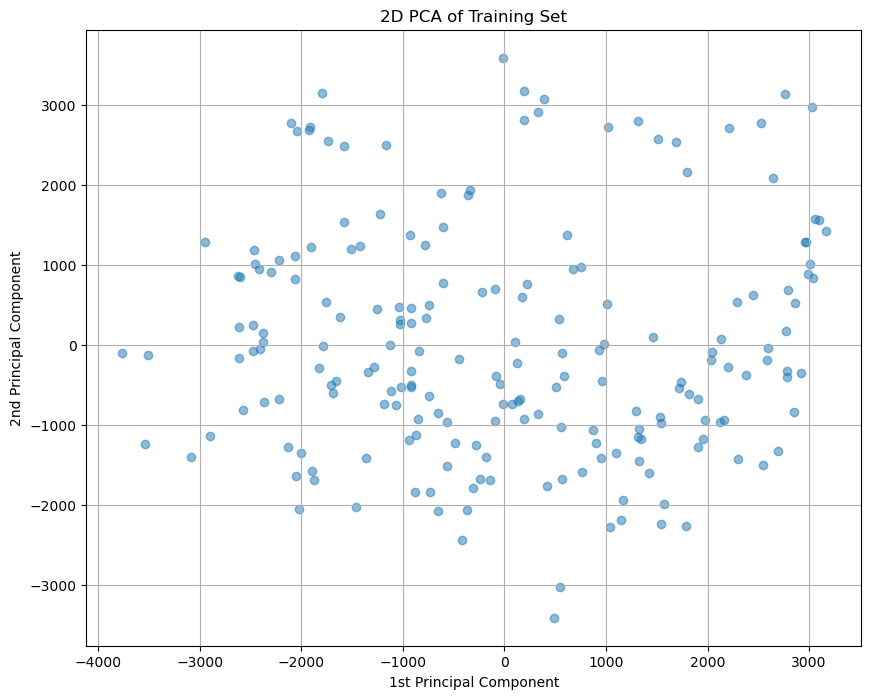

In [5]:
new_training_set,new_space,means = my_pca(Train,31)

plt.figure(figsize=(10, 8))
plt.scatter(new_training_set[:, 0], new_training_set[:, 1], alpha=0.5)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('2D PCA of Training Set')
plt.grid(True)
plt.show()


# 1.2 a) Importing PCA from sklearn


In [6]:
from sklearn.decomposition import PCA

# 1.2 b) Applying PCA to Train using sklearn

In [7]:
k = 31
pca = PCA(n_components = k)
pca.fit(Train)
reduce_train = pca.transform(Train)



# 2.1 a)Creating my_kpca that implements rbf,poly, and linear KPCA's

In [8]:
def rbf_kernel(x, y, gamma=1.0):
    """
    Radial Basis Function (RBF) kernel.
    """
    distance = np.linalg.norm(np.array(x) - np.array(y)) ** 2
    return np.exp(-gamma * distance)

def poly_kernel(x, y, degree=3):
    """
    Polynomial kernel.
    """
    return (np.dot(x, y) + 1) ** degree

def linear_kernel(x, y):
    """
    Linear kernel.
    """
    return np.dot(x, y)

def my_kpca(data, n_components, kernel_type='rbf', kernel_param=1.0):
    """
    Kernel Principal Component Analysis (KPCA) function.
    """
    # Define a dictionary for kernel selection
    kernel_functions = {
        'rbf': rbf_kernel,
        'poly': poly_kernel,
        'linear': linear_kernel
    }
    
    # Get the selected kernel function
    kernel = kernel_functions[kernel_type]
    
    # Compute the kernel matrix
    n_samples = data.shape[0]
    kernel_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            if kernel_type in ['rbf', 'poly']:
                kernel_matrix[i, j] = kernel(data[i], data[j], kernel_param)
            else:
                kernel_matrix[i, j] = kernel(data[i], data[j])

    # Center the kernel matrix
    one_n = np.ones((n_samples, n_samples)) / n_samples
    centered_kernel_matrix = kernel_matrix - one_n.dot(kernel_matrix) - kernel_matrix.dot(one_n) + one_n.dot(kernel_matrix).dot(one_n)

    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(centered_kernel_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Project the data onto the selected components
    data_kpca = np.dot(centered_kernel_matrix, eigenvectors[:, :n_components])

    return data_kpca


# 2.1 KPCA with RBF Kernel


In [9]:
train_rbf_kernel = my_kpca(Train, n_components=31, kernel_type='rbf', kernel_param=1)
print(train_rbf_kernel)

[[-1.35525272e-18  2.05998413e-18 -1.24683250e-18 ... -7.58941521e-19
  -6.07153217e-18 -1.51788304e-18]
 [ 1.84121139e-02 -2.17046710e-02 -2.68977668e-03 ...  9.15134778e-03
   9.16494456e-02 -2.47223734e-03]
 [-1.51072096e-02  1.77275379e-02 -4.45995544e-03 ...  1.11523900e-02
   1.41045065e-01  2.14741421e-02]
 ...
 [-1.94434184e-02  1.11100816e-01 -2.99273855e-02 ... -1.33419541e-01
  -7.48156250e-03 -1.61869567e-02]
 [ 5.74443664e-02  1.93742205e-02 -1.11714938e-02 ... -7.21586126e-03
  -2.82116100e-02 -2.82046196e-04]
 [ 1.62394236e-02 -3.77295796e-02  7.94535761e-03 ... -3.25762045e-02
  -2.76036379e-02  7.39763866e-03]]


# 2.2 KPCA with Polynomial Kernel

In [10]:
train_poly_kernel = my_kpca(Train, n_components=31, kernel_type='poly', kernel_param=3)
print(train_poly_kernel)

[[-1.46782585e+19  8.63544234e+18 -1.06473941e+19 ... -4.40583610e+18
  -3.69360634e+18  6.76077990e+18]
 [ 6.21764592e+18  3.11040327e+18 -1.48978678e+19 ... -1.06838616e+19
   9.71592014e+16 -2.99219419e+18]
 [ 2.29059216e+19  1.84016248e+19  7.90223446e+18 ...  1.05744638e+19
  -7.38078996e+18  1.08145790e+18]
 ...
 [ 1.55907739e+19  6.87873427e+17 -2.53347729e+18 ...  1.72702898e+18
   6.33146611e+18 -2.46375573e+18]
 [-1.38518579e+19  1.20540771e+19 -1.98208864e+17 ...  9.09278037e+17
   3.69759848e+18  2.48254402e+18]
 [-6.60939631e+17  6.72531554e+18 -4.06327474e+18 ...  3.00410513e+18
   3.69404414e+17  3.00357802e+18]]


# 2.3 KPCA with Linear Kernel

In [11]:
train_linear_kernel = my_kpca(Train, n_components=31, kernel_type='linear')
print(train_linear_kernel)

[[-3.37018759e+07  2.84850920e+07  2.72727677e+07 ...  6.62708625e+05
   2.49841520e+05 -6.53649446e+05]
 [-7.18290167e+07  2.29307957e+07 -4.78686164e+06 ... -1.66970168e+05
  -2.74218449e+04  9.33608824e+05]
 [-6.36300650e+07  1.63293519e+07  1.21440054e+07 ...  1.25721155e+06
   5.25707758e+05  1.12255890e+06]
 ...
 [ 3.19705943e+07  1.66973993e+07 -6.43382159e+06 ... -6.75117581e+05
  -9.39795872e+05 -6.66282119e+05]
 [ 2.71283753e+07  2.73095758e+07 -3.92664839e+06 ... -1.16062483e+06
  -2.01014736e+06 -7.27668634e+05]
 [ 3.52738280e+07  3.23707913e+07 -2.83611034e+06 ... -8.08345250e+05
  -5.71010656e+05 -2.58878514e+05]]


# 3.1 Transforming Test Data with PCA and KPCA Train Data

In [15]:
    from sklearn.decomposition import KernelPCA

    #Transforming data with Train PCA
    n_components = 31
    centered_test = Test - means
    transformed_test_pca = np.dot(centered_test,new_space[:,:n_components])
        
    #Transforming data with Train rbf KPCA
    n_components = 31
    kpca_rbf = KernelPCA(kernel = 'rbf', gamma = 1.0, n_components = n_components)
    data_kpca_rbf = kpca_rbf.fit_transform(Train)
    transformed_test_rbf = kpca_rbf.transform(Test)
    
    #Transforming data with Train poly KPCA
    n_components = 31
    kpca_poly = KernelPCA(kernel = 'poly', degree = 3, n_components = n_components)
    data_kpca_poly = kpca_poly.fit_transform(Train)
    transformed_test_poly = kpca_poly.transform(Test)
    
    





# 3.2 Classification Experiment

In [16]:
def dis(x1, x2):
    return np.linalg.norm(x1 - x2)

# Function to perform classification 
def myclassifier(Train, Trainlabel, Test):
    " Train is the training data"
    " Trainlabel is the training labels"
    " Test is the testing data"
    pred = []

    for testpoint in Test:
        pred_dis = []
        for trainpoint in Train:
            pred_dis.append(dis(testpoint, trainpoint))

        pred.append(Trainlabel[np.argmin(pred_dis)])

    return np.array(pred)


In [17]:
def calculate_accuracy(true_labels, predicted_labels):
    # Ensure that the true labels and predicted labels have the same length
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Length of true_labels and predicted_labels must be the same.")

    # Count the number of correct predictions
    correct_predictions = sum(1 for true, predicted in zip(true_labels, predicted_labels) if true == predicted)

    # Calculate accuracy as the ratio of correct predictions to total predictions
    accuracy = correct_predictions / len(true_labels)

    return accuracy

In [18]:
#  Testing PCA
pred_pca = myclassifier(new_training_set,y_train,transformed_test_pca)
accuracy = calculate_accuracy(y_test, pred_pca)
print(accuracy*100)



88.0


In [19]:
# Testing KPCA rbf
pred_kpca_rbf = myclassifier(data_kpca_rbf,y_train,transformed_test_rbf)
accuracy = calculate_accuracy(y_test,pred_kpca_rbf)
print(accuracy*100)

2.5


In [20]:
#Testing KPCA poly
pred_kpca_poly = myclassifier(data_kpca_poly,y_train,transformed_test_poly)
accuracy = calculate_accuracy(y_test,pred_kpca_poly)
print(accuracy*100)

85.0


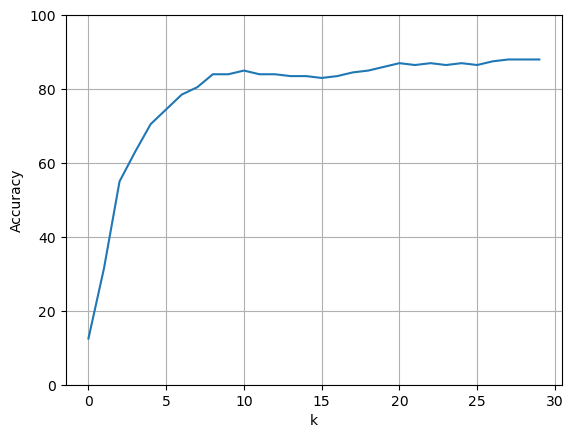

In [21]:
accuracies = []
for k in range(1,31):
    pca = PCA(n_components = k)
    pca.fit(Train)
    reduced_train = pca.transform(Train)
    reduced_test = pca.transform(Test)
    pred = myclassifier(reduced_train,y_train,reduced_test)
    accuracy = calculate_accuracy(y_test,pred)
    accuracies.append(accuracy*100)
    
accuracies = np.array(accuracies)
plt.plot(accuracies)
plt.ylim([0,100])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()


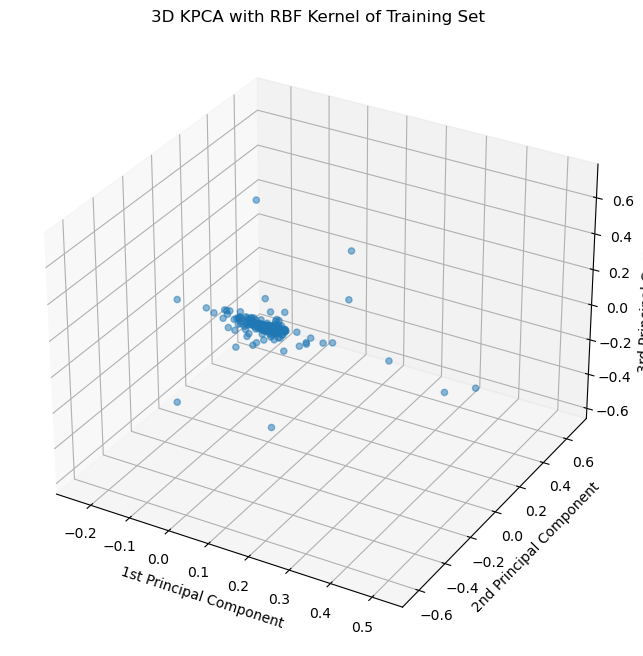

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the first three components
x = data_kpca_rbf[:, 0]
y = data_kpca_rbf[:, 1]
z = data_kpca_rbf[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha=0.5)

ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')
ax.set_title('3D KPCA with RBF Kernel of Training Set')

plt.show()

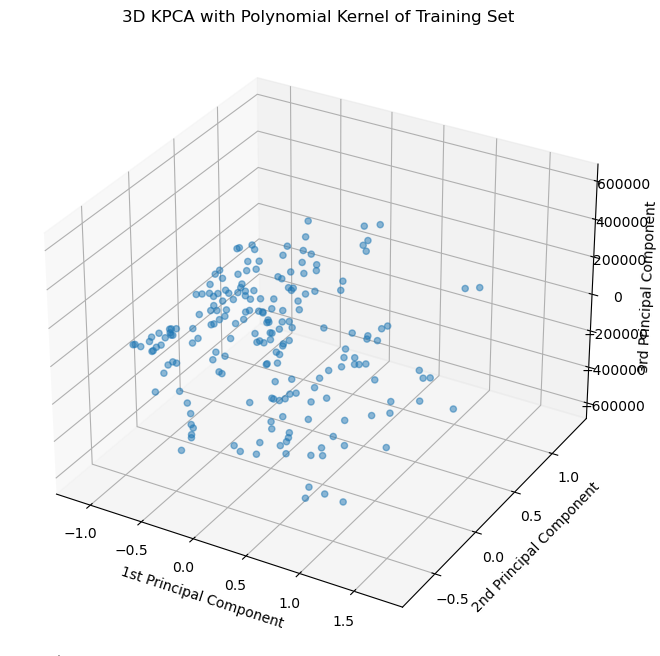

In [23]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the first three components
x = data_kpca_poly[:, 0]
y = data_kpca_poly[:, 1]
z = data_kpca_poly[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha=0.5)

ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')
ax.set_title('3D KPCA with Polynomial Kernel of Training Set')

plt.show()

# Conclusions - 
    When we reduce the dimensionality for these data sets when we use both PCA and KPCA we signifigantly reduce the time when we are classifying. This is due to use only using a certian limit of componets, for example I reduced the dimensionality to only 31 components. These data sets have 10305 components and we did it with only 31.
    
    An advantage that we can observe from when we use sklearn PCA and KPCA functions instead of our own made from scratch is that it takes faster to run. A disadvange using sklearn though is the memory consumption , for large data sets it consumes a lot of memory. Sklearn also doesn't leave room for a lot of customization so if you wanted specific data returned from the PCA or KPCA you wouldn't be able to specify what specificly you want returned unless you implemented it yourself.

idx =  [47]
best_match= 48


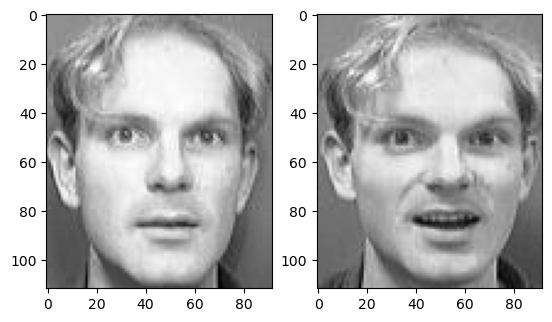

In [26]:
#
idx1 = np.random.choice(200,1)
test = Test[idx1,:]
True_label = y_test[idx1]
x1=test.reshape(112,92)

k = 33
pca = PCA(n_components = k)
pca.fit(Train)
reduce_train = pca.transform(Train)
reduce_test = pca.transform(test)
#calculate distance between test image and all Train data

dis1=[]
for i in range (200):
    d=dis(reduce_test,reduce_train[i,:])
    dis1.append(d)

distances = np.array(dis1)
best_match =np.argmin(distances)
print('idx = ',idx1)
print('best_match=',best_match)

y1=Train[best_match]
y2=y1.reshape(112,92)
plt.subplot(1,2,1)
plt.imshow(x1,cmap='gray')


plt.subplot(1,2,2)
plt.imshow(y2,cmap='gray')
